In [ ]:
# install dependencies

%pip install urduhack
%pip install nlu pyspark==3.3.1
%pip install time
%pip install pandas
%pip install numpy
%pip install sklearn
%pip install matplotlib
%pip install seaborn
%pip install tensorflow
%pip install keras
%pip install nltk
%pip install gensim
%pip install typing

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
train_df = pd.read_csv('/content/drive/MyDrive/train.csv',encoding='latin-1')
test_df= pd.read_csv('/content/drive/MyDrive/test.csv',encoding='latin-1')

Mounted at /content/drive/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
import pandas as pd

# load dataset locally
train_df = pd.read_csv('../data/TestDataset.csv',encoding='latin-1')
test_df= pd.read_csv('../data/TestDataset.csv',encoding='latin-1')

In [5]:
# Remove stop words from text
from typing import FrozenSet
STOP_WORDS: FrozenSet[str] = frozenset("""
    آ آئی آئیں آئے آتا آتی آتے آس آمدید آنا آنسہ آنی آنے آپ آگے آہ آہا آیا اب ابھی ابے
    ارے اس اسکا اسکی اسکے اسی اسے اف افوہ البتہ الف ان اندر انکا انکی انکے انہوں انہی انہیں اوئے اور اوپر
    اوہو اپ اپنا اپنوں اپنی اپنے اپنےآپ اکثر اگر اگرچہ اہاہا ایسا ایسی ایسے ایک بائیں بار بارے بالکل باوجود باہر
    بج بجے بخیر بشرطیکہ بعد بعض بغیر بلکہ بن بنا بناؤ بند بڑی بھر بھریں بھی بہت بہتر تاکہ تاہم تب تجھ
    تجھی تجھے ترا تری تلک تم تمام تمہارا تمہاروں تمہاری تمہارے تمہیں تو تک تھا تھی تھیں تھے تیرا تیری تیرے
    جا جاؤ جائیں جائے جاتا جاتی جاتے جانی جانے جب جبکہ جدھر جس جسے جن جناب جنہوں جنہیں جو جہاں جی جیسا
    جیسوں جیسی جیسے حالانکہ حالاں حصہ حضرت خاطر خالی خواہ خوب خود دائیں درمیان دریں دو دوران دوسرا دوسروں دوسری دوں
    دکھائیں دی دیئے دیا دیتا دیتی دیتے دیر دینا دینی دینے دیکھو دیں دیے دے ذریعے رکھا رکھتا رکھتی رکھتے رکھنا رکھنی
    رکھنے رکھو رکھی رکھے رہ رہا رہتا رہتی رہتے رہنا رہنی رہنے رہو رہی رہیں رہے ساتھ سامنے ساڑھے سب سبھی
    سراسر سمیت سوا سوائے سکا سکتا سکتے سہ سہی سی سے شاید شکریہ صاحب صاحبہ صرف ضرور طرح طرف طور علاوہ عین
    فقط فلاں فی قبل قطا لئے لائی لائے لاتا لاتی لاتے لانا لانی لانے لایا لو لوجی لوگوں لگ لگا لگتا
    لگتی لگی لگیں لگے لہذا لی لیا لیتا لیتی لیتے لیکن لیں لیے لے ماسوا مت مجھ مجھی مجھے محترم محترمہ محض
    مرا مرحبا مری مرے مزید مس مسز مسٹر مطابق مل مکرمی مگر مگھر مہربانی میرا میروں میری میرے میں نا نزدیک
    نما نہ نہیں نیز نیچے نے و وار واسطے واقعی والا والوں والی والے واہ وجہ ورنہ وغیرہ ولے وگرنہ وہ وہاں
    وہی وہیں ویسا ویسے ویں پاس پایا پر پس پلیز پون پونی پونے پھر پہ پہلا پہلی پہلے پیر پیچھے چاہئے
    چاہتے چاہیئے چاہے چلا چلو چلیں چلے چناچہ چند چونکہ چکی چکیں چکے ڈالنا ڈالنی ڈالنے ڈالے کئے کا کاش کب کبھی
    کدھر کر کرتا کرتی کرتے کرم کرنا کرنے کرو کریں کرے کس کسی کسے کم کن کنہیں کو کوئی کون کونسا
    کونسے کچھ کہ کہا کہاں کہہ کہی کہیں کہے کی کیا کیسا کیسے کیونکر کیونکہ کیوں کیے کے گئی گئے گا گنا
    گو گویا گی گیا ہائیں ہائے ہاں ہر ہرچند ہرگز ہم ہمارا ہماری ہمارے ہمی ہمیں ہو ہوئی ہوئیں ہوئے ہوا
    ہوبہو ہوتا ہوتی ہوتیں ہوتے ہونا ہونگے ہونی ہونے ہوں ہی ہیلو ہیں ہے یا یات یعنی یک یہ یہاں یہی یہیں
    """.split())

def remove_stopwords(text: str):
    return " ".join(word for word in text.split() if word not in STOP_WORDS)

def NLP(train_df,test_df):
    # Urdu Language Stop words list
    df_train =  train_df.copy()
    df_test  =   test_df.copy()
    df_train['Sentence1'] = df_train['Sentence1'].apply(normalize) # To normalize some text, all you need to do pass unicode text. It will return a str with normalized characters both single and combined, proper spaces after digits and punctuations and diacritics(Zabar - Paish) removed.
    df_train['Sentence1'] = df_train['Sentence1'].apply(remove_punctuation) # Remove punctuation from text by removing all instances of marks. marks=',;:'
    df_train['Sentence1'] = df_train['Sentence1'].apply(remove_accents) # Remove accents from any accented unicode characters in text str, either by transforming them into ascii equivalents or removing them entirely.
    df_train['Sentence1'] = df_train['Sentence1'].apply(replace_urls) # Replace all URLs in text str with replace_with str.
    df_train['Sentence1'] = df_train['Sentence1'].apply(replace_emails) # Replace all emails in text str with replace_with str.
    df_train['Sentence1'] = df_train['Sentence1'].apply(replace_numbers) # Replace all numbers in text str with replace_with str.
    df_train['Sentence1'] = df_train['Sentence1'].apply(replace_currency_symbols) # Replace all currency symbols in text str with string specified by replace_with str.
    df_train['Sentence1'] = df_train['Sentence1'].apply(normalize_whitespace) ## Given text str, replace one or more spacings with a single space, and one or more linebreaks with a single newline. Also strip leading/trailing whitespace.

    df_train['Sentence2'] = df_train['Sentence2'].apply(normalize) # To normalize some text, all you need to do pass unicode text. It will return a str with normalized characters both single and combined, proper spaces after digits and punctuations and diacritics(Zabar - Paish) removed.
    df_train['Sentence2'] = df_train['Sentence2'].apply(remove_punctuation) # Remove punctuation from text by removing all instances of marks. marks=',;:'
    df_train['Sentence2'] = df_train['Sentence2'].apply(remove_accents) # Remove accents from any accented unicode characters in text str, either by transforming them into ascii equivalents or removing them entirely.
    df_train['Sentence2'] = df_train['Sentence2'].apply(replace_urls) # Replace all URLs in text str with replace_with str.
    df_train['Sentence2'] = df_train['Sentence2'].apply(replace_emails) # Replace all emails in text str with replace_with str.
    df_train['Sentence2'] = df_train['Sentence2'].apply(replace_numbers) # Replace all numbers in text str with replace_with str.
    df_train['Sentence2'] = df_train['Sentence2'].apply(replace_currency_symbols) # Replace all currency symbols in text str with string specified by replace_with str.
    df_train['Sentence2'] = df_train['Sentence2'].apply(normalize_whitespace) ## Given text str, replace one or more spacings with a single space, and one or more linebreaks with a single newline. Also strip leading/trailing whitespace.

    df_test['Sentence1'] = df_test['Sentence1'].apply(normalize) # To normalize some text, all you need to do pass unicode text. It will return a str with normalized characters both single and combined, proper spaces after digits and punctuations and diacritics(Zabar - Paish) removed.
    df_test['Sentence1'] = df_test['Sentence1'].apply(remove_punctuation) # Remove punctuation from text by removing all instances of marks. marks=',;:'
    df_test['Sentence1'] = df_test['Sentence1'].apply(remove_accents) # Remove accents from any accented unicode characters in text str, either by transforming them into ascii equivalents or removing them entirely.
    df_test['Sentence1'] = df_test['Sentence1'].apply(replace_urls) # Replace all URLs in text str with replace_with str.
    df_test['Sentence1'] = df_test['Sentence1'].apply(replace_emails) # Replace all emails in text str with replace_with str.
    df_test['Sentence1'] = df_test['Sentence1'].apply(replace_numbers) # Replace all numbers in text str with replace_with str.
    df_test['Sentence1'] = df_test['Sentence1'].apply(replace_currency_symbols) # Replace all currency symbols in text str with string specified by replace_with str.
    df_test['Sentence1'] = df_test['Sentence1'].apply(normalize_whitespace) ## Given text str, replace one or more spacings with a single space, and one or more linebreaks with a single newline. Also strip leading/trailing whitespace.

    df_test['Sentence2'] = df_test['Sentence2'].apply(normalize) # To normalize some text, all you need to do pass unicode text. It will return a str with normalized characters both single and combined, proper spaces after digits and punctuations and diacritics(Zabar - Paish) removed.
    df_test['Sentence2'] = df_test['Sentence2'].apply(remove_punctuation) # Remove punctuation from text by removing all instances of marks. marks=',;:'
    df_test['Sentence2'] = df_test['Sentence2'].apply(remove_accents) # Remove accents from any accented unicode characters in text str, either by transforming them into ascii equivalents or removing them entirely.
    df_test['Sentence2'] = df_test['Sentence2'].apply(replace_urls) # Replace all URLs in text str with replace_with str.
    df_test['Sentence2'] = df_test['Sentence2'].apply(replace_emails) # Replace all emails in text str with replace_with str.
    df_test['Sentence2'] = df_test['Sentence2'].apply(replace_numbers) # Replace all numbers in text str with replace_with str.
    df_test['Sentence2'] = df_test['Sentence2'].apply(replace_currency_symbols) # Replace all currency symbols in text str with string specified by replace_with str.
    df_test['Sentence2'] = df_test['Sentence2'].apply(normalize_whitespace) ## Given text str, replace one or more spacings with a single space, and one or more linebreaks with a single newline. Also strip leading/trailing whitespace.

    df_train['Sentence1'] =  df_train['Sentence1'].apply(remove_stopwords)
    df_train['Sentence2'] =  df_train['Sentence2'].apply(remove_stopwords)
    df_test['Sentence1'] =  df_train['Sentence1'].apply(remove_stopwords)
    df_test['Sentence2'] =  df_train['Sentence2'].apply(remove_stopwords)

    sentences1 = list(df_train['Sentence1'])
    sentences2 = list(df_train['Sentence2'])
    is_similar = list(df_train['Similarity']/2)

    sentences1_test = list(df_test['Sentence1'])
    sentences2_test = list(df_test['Sentence2'])
    is_similar_test = list(df_test['Similarity']/2)

    return sentences1,sentences2,is_similar,df_train,df_test,sentences1_test,sentences2_test,is_similar_test

In [2]:
from time import time
import pandas as pd
import numpy as np
from gensim.models import KeyedVectors
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import datetime
# keras imports
from keras.layers import Dense, Input, LSTM, Dropout, Bidirectional
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import BatchNormalization
from keras.layers import Embedding
from keras.layers import concatenate
from keras.callbacks import TensorBoard
from keras.models import load_model
from keras.models import Model
# std imports
import time
import gc
import os

import urduhack
urduhack.download()
from urduhack.normalization import normalize
from urduhack.preprocessing import normalize_whitespace, remove_punctuation, remove_accents, replace_urls, replace_emails, replace_numbers, replace_currency_symbols

# Remove stop words from text
from typing import FrozenSet

c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


89078/89078 [==============================] - 0s 1us/step


In [6]:
import nlu
import re
sentences1,sentences2,is_similar,df_train,df_test,sentences1_test,sentences2_test,is_similar_test=NLP(train_df,test_df)
print(is_similar[0])
def text_to_word_list(text):
    ''' Pre process and convert texts to a list of words '''
    text=str(text)
    text = text.split()
    return text
def embedding(df_train):
    vocabulary = dict()
    inverse_vocabulary = []
    word2vec=nlu.load('ur.embed.urdu_vec_140M_300d')
    print(word2vec)
    questions_cols = ['Sentence1', 'Sentence2']

    dataset=df_train
    for index, row in dataset.iterrows():
        for question in questions_cols:
            q2n = []
            for word in text_to_word_list(row[question]):
                if word not in vocabulary:
                    vocabulary[word] = len(inverse_vocabulary)
                    q2n.append(len(inverse_vocabulary))
                    inverse_vocabulary.append(word)
                else:
                    q2n.append(vocabulary[word])
            dataset.at[index, question] = q2n
    embedding_dim = 300
    embeddings = 1 * np.random.randn(len(vocabulary) + 1, embedding_dim)  # This will be the embedding matrix
    embeddings[0] = 0
    # Build the embedding matrix
    for word, index in vocabulary.items():
        if word in word2vec.raw_text_column:
            embeddings[index] = float(word2vec.raw_text_column)
    print(embeddings.shape[0])
    del word2vec
    return embeddings

1.0


In [ ]:
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer
from gensim.models import Word2Vec
import numpy as np
import gc
import nlu
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()

embeddings=embedding(df_train)
embeddings=scaler.fit_transform(embeddings)
embeddings_test=embedding(df_test)
embeddings_test=scaler.fit_transform(embeddings_test)

def train_word2vec(documents, embedding_dim):
    model = Word2Vec(documents, min_count=1, size=embedding_dim)
    word_vectors = model.wv
    del model
    return word_vectors

def text_to_word_list(text):
    ''' Pre process and convert texts to a list of words '''
    text=str(text)
    text = text.split()
    return text

def create_embedding_matrix(df_train):
    vocabulary=dict()
    inverse_vocabulary = []
    word2vec=nlu.load('ur.embed.urdu_vec_140M_300d')
    questions_cols = ['Sentence1', 'Sentence2']

    # Iterate over the questions only of both training and test datasets
    dataset=df_train
    for index, row in dataset.iterrows():
        # Iterate through the text of both questions of the row
        for question in questions_cols:
            q2n = []  # q2n -> question numbers representation
            for word in text_to_word_list(row[question]):
                if word not in vocabulary:
                    vocabulary[word] = len(inverse_vocabulary)
                    q2n.append(len(inverse_vocabulary))
                    inverse_vocabulary.append(word)
                else:
                    q2n.append(vocabulary[word])

            # Replace questions as word to question as number representation
            dataset.at[index, question] = q2n

    embedding_dim = 300
    embeddings = 1 * np.random.randn(len(vocabulary) + 1, embedding_dim)  # This will be the embedding matrix
    embeddings[0] = 0  # So that the padding will be ignored

    # Build the embedding matrix
    for word, index in vocabulary.items():
        if word in word2vec.raw_text_column:
            embeddings[index] = float(word2vec.raw_text_column)
    return embeddings

def word_embed_meta_data(documents, embedding_dim):
    documents = [str(x).split() for x in documents]
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(documents)
    embedding_matrix = embeddings
    gc.collect()
    return tokenizer, embedding_matrix

def create_train_dev_set(tokenizer, sentences_pair, is_similar, max_sequence_length, validation_split_ratio):
    sentences1 = [x[0] for x in sentences_pair]
    sentences2 = [x[1] for x in sentences_pair]
    train_sequences_1 = tokenizer.texts_to_sequences(sentences1)
    train_sequences_2 = tokenizer.texts_to_sequences(sentences2)
    leaks = [[len(set(x1)), len(set(x2)), len(set(x1).intersection(x2))]
             for x1, x2 in zip(train_sequences_1, train_sequences_2)]

    train_padded_data_1 = pad_sequences(train_sequences_1, maxlen=max_sequence_length)
    train_padded_data_2 = pad_sequences(train_sequences_2, maxlen=max_sequence_length)
    train_labels = np.array(is_similar)
    leaks = np.array(leaks)

    shuffle_indices = np.random.permutation(np.arange(len(train_labels)))
    train_data_1_shuffled = train_padded_data_1[shuffle_indices]
    train_data_2_shuffled = train_padded_data_2[shuffle_indices]
    train_labels_shuffled = train_labels[shuffle_indices]
    leaks_shuffled = leaks[shuffle_indices]

    dev_idx = max(1, int(len(train_labels_shuffled) * validation_split_ratio))

    del train_padded_data_1
    del train_padded_data_2
    gc.collect()
    train_data_1, val_data_1 = train_data_1_shuffled[:-dev_idx], train_data_1_shuffled[-dev_idx:]
    train_data_2, val_data_2 = train_data_2_shuffled[:-dev_idx], train_data_2_shuffled[-dev_idx:]
    labels_train, labels_val = train_labels_shuffled[:-dev_idx], train_labels_shuffled[-dev_idx:]
    leaks_train, leaks_val = leaks_shuffled[:-dev_idx], leaks_shuffled[-dev_idx:]

    return train_data_1, train_data_2, labels_train, leaks_train, val_data_1, val_data_2, labels_val, leaks_val


def create_test_data(tokenizer, test_sentences_pair, max_sequence_length):
    test_sentences1 = [x[0] for x in test_sentences_pair]
    test_sentences2 = [x[1] for x in test_sentences_pair]
    test_sequences_1 = tokenizer.texts_to_sequences(test_sentences1)
    test_sequences_2 = tokenizer.texts_to_sequences(test_sentences2)
    leaks_test = [[len(set(x1)), len(set(x2)), len(set(x1).intersection(x2))]
                  for x1, x2 in zip(test_sequences_1, test_sequences_2)]

    leaks_test = np.array(leaks_test)
    test_data_1 = pad_sequences(test_sequences_1, maxlen=max_sequence_length)
    test_data_2 = pad_sequences(test_sequences_2, maxlen=max_sequence_length)

    return test_data_1, test_data_2, leaks_test

In [ ]:
######## Word Embedding(train)############
tokenizer, embedding_matrix = word_embed_meta_data(sentences1 + sentences2,  300)

embedding_meta_data = {
	'tokenizer': tokenizer,
	'embedding_matrix': embedding_matrix
}
## creating sentence pairs
sentences_pair = [(x1, x2) for x1, x2 in zip(sentences1, sentences2)]


######## Word embedding_matrix(test)############
tokenizer_test, embedding_matrix_test = word_embed_meta_data(sentences1_test + sentences2_test,  300)

embedding_meta_data_test = {
	'tokenizer': tokenizer_test,
	'embedding_matrix': embedding_matrix_test
}
## creating sentence pairs
sentences_pair_test = [(x1, x2) for x1, x2 in zip(sentences1_test, sentences2_test)]
del sentences1
del sentences2
del sentences1_test
del sentences2_test

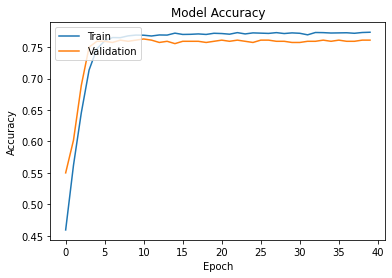

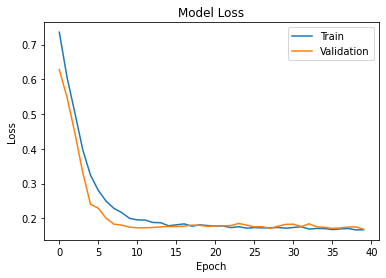

In [ ]:
# Plot accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
######## Training ########
import time
import os

embedding_dim = 300
max_sequence_length = 10
number_lstm_units = 256
rate_drop_lstm = 0.17
number_dense_units1 = 64
number_dense_units2 = 32
number_dense_units3 = 16
number_dense_units4 = 8
activation_function = 'relu'
rate_drop_dense = 0.4
validation_split_ratio = 0.1


tokenizer, embedding_matrix = embedding_meta_data['tokenizer'], embedding_meta_data['embedding_matrix']
train_data_x1, train_data_x2, train_labels,\
leaks_train, val_data_x1, val_data_x2,\
 val_labels, leaks_val = create_train_dev_set(tokenizer, sentences_pair,
                                              is_similar, max_sequence_length,
                                                                                            validation_split_ratio)
nb_words = len(tokenizer.word_index) + 1

# Creating word embedding layer
embedding_layer = Embedding(nb_words, embedding_dim, weights=[embedding_matrix[:24201]],
                                                        input_length=max_sequence_length, trainable=False)

# Creating LSTM Encoder
lstm_layer = Bidirectional(LSTM(number_lstm_units, dropout=rate_drop_lstm, recurrent_dropout=rate_drop_lstm))

# Creating LSTM Encoder layer for First Sentence
sequence_1_input = Input(shape=(max_sequence_length,), dtype='int32')
embedded_sequences_1 = embedding_layer(sequence_1_input)
x1 = lstm_layer(embedded_sequences_1)


# Creating LSTM Encoder layer for Second Sentence
sequence_2_input = Input(shape=(max_sequence_length,), dtype='int32')
embedded_sequences_2 = embedding_layer(sequence_2_input)
x2 = lstm_layer(embedded_sequences_2)

# Creating leaks input
leaks_input = Input(shape=(leaks_train.shape[1],))
leaks_dense = Dense(int(number_dense_units1/2), activation=activation_function)(leaks_input)

merged = concatenate([x1, x2, leaks_dense])
merged = BatchNormalization()(merged)
merged = Dropout(rate_drop_dense)(merged)
merged = Dense(number_dense_units1, activation=activation_function)(merged)
merged = BatchNormalization()(merged)
merged = Dropout(rate_drop_dense)(merged)
merged = Dense(number_dense_units2, activation=activation_function)(merged)
merged = BatchNormalization()(merged)
merged = Dropout(rate_drop_dense)(merged)
merged = Dense(number_dense_units3, activation=activation_function)(merged)
merged = BatchNormalization()(merged)
merged = Dense(number_dense_units4, activation=activation_function)(merged)
merged = BatchNormalization()(merged)
preds = Dense(1,activation='sigmoid')(merged)

model = Model(inputs=[sequence_1_input, sequence_2_input, leaks_input], outputs=preds)

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

#early_stopping = EarlyStopping(monitor='val_loss', patience=1)

STAMP = 'lstm_%d_%d_%d_%.2f_%.2f' % (number_lstm_units, number_dense_units1, number_dense_units2,rate_drop_lstm, rate_drop_dense)
model_save_directory="model1"
checkpoint_dir = model_save_directory + 'checkpoints/' + str(int(time.time())) + '/'

if not os.path.exists(checkpoint_dir):
        os.makedirs(checkpoint_dir)

bst_model_path = checkpoint_dir + STAMP + '.h5'

model_checkpoint = ModelCheckpoint(bst_model_path, save_best_only=True, save_weights_only=False)

tensorboard = TensorBoard(log_dir=checkpoint_dir + "logs/{}".format(time.time()))

history=model.fit([train_data_x1, train_data_x2, leaks_train], train_labels,
                    validation_data=([val_data_x1, val_data_x2, leaks_val], val_labels),
                    epochs=40, batch_size=64, shuffle=True,
                    callbacks=[ model_checkpoint, tensorboard])

Epoch 1/40
76/76 [==============================] - 28s 196ms/step - loss: 0.7355 - acc: 0.4593 - val_loss: 0.6279 - val_acc: 0.5500
Epoch 2/40
76/76 [==============================] - 14s 185ms/step - loss: 0.6051 - acc: 0.5619 - val_loss: 0.5475 - val_acc: 0.6019
Epoch 3/40
76/76 [==============================] - 16s 216ms/step - loss: 0.5034 - acc: 0.6453 - val_loss: 0.4454 - val_acc: 0.6889
Epoch 4/40
76/76 [==============================] - 14s 183ms/step - loss: 0.3980 - acc: 0.7136 - val_loss: 0.3328 - val_acc: 0.7500
Epoch 5/40
76/76 [==============================] - 14s 185ms/step - loss: 0.3242 - acc: 0.7475 - val_loss: 0.2406 - val_acc: 0.7593
Epoch 6/40
76/76 [==============================] - 14s 189ms/step - loss: 0.2804 - acc: 0.7597 - val_loss: 0.2292 - val_acc: 0.7593
Epoch 7/40
76/76 [==============================] - 14s 190ms/step - loss: 0.2495 - acc: 0.7652 - val_loss: 0.2004 - val_acc: 0.7574
Epoch 8/40
76/76 [==============================] - 14s 190ms/step - 

In [ ]:
from operator import itemgetter
from keras.models import load_model
print(embeddings_test.shape)
test_data_1, test_data_2, leaks_test=test_data_x1, test_data_x2, leaks_test = create_test_data(tokenizer, sentences_pair_test, max_sequence_length)
preds = list(model.predict([test_data_1, test_data_2, leaks_test], verbose=1).ravel())

(14564, 300)
19/19 [==============================] - 1s 25ms/step


In [ ]:
print(round(preds[555]*2))

0
